# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import os
import requests
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import json
from wordcloud import WordCloud 

% matplotlib inline
sns.set(style = 'white')
pd.options.display.float_format = '{0:,.2f}'.format

# Data Gathering

## Data Source 1: Twitter Archive (CSV Data)

In [3]:
twitter_df = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   
1  892177421306343426                    nan                  nan   
2  891815181378084864                    nan                  nan   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   
1  This is Tilly. She's just checking pup on you....                  nan   
2  This is Archie. He is a rare Norwegian Pouncin...                  nan   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       nan                        NaN   
1                       nan                        NaN   
2                       nan                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

## Data Source 2: Image Predictions (Internet Data)

In [18]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [19]:
response = requests.get(url)

In [20]:
with open('image_predictions.tsv','wb') as predictions_file:
    predictions_file.write(response.content)

In [4]:
predict_df = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
predict_df.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1  p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel     0.47    True              collie   
1        1                 redbone     0.51    True  miniature_pinscher   
2        1         German_shepherd     0.60    True            malinois   

   p2_conf  p2_dog                   p3  p3_conf  p3_dog  
0     0.16    True    Shetland_sheepdog     0.06    True  
1     0.07    True  Rhodesian_ridgeback     0.07    True  
2     0.14    True           bloodhound     0.12    True

## Data Source 3: Tweets Information (Twitter Json)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
count = 0
fails_dict = {}
start = timer()

In [ ]:
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
dfcolumns = ['tweet_id','retweet_count','favorite_count']
df_list = []
with open('tweet_json.txt','r',encoding='utf-8') as file: 
    for line in file:
        line_data = json.loads(line)
        df_list.append({'tweet_id':line_data.get('id'),
                       'retweet_count':line_data.get('retweet_count'),
                       'favorite_count':line_data.get('favorite_count')})
tweet_df = pd.DataFrame(df_list,columns=dfcolumns)
tweet_df.head(3)
            

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

# Assess

## Visual Assessment

The <b>twitter archive (data source 1)</b> was opened in Excel and the following checkes were made: 
<ul>
  <li>verify dog names starting with lower case or blanks(if any)</li>
  <li>verify duplicate dog names to check they are legit and not due to retweets</li>
  <li>verify rating denominators different from 10</li>
  <li>verify rating numerators higher than 20</li>  
</ul>

## Programmatic Assessment

### Data Structure / Data Types / Missing Data

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Data Correctness

In [12]:
#Distribution of values to check for unexpected outliers 
twitter_df.describe()

tweet_id      in_reply_to_status_id  \
count                   2,356.00                      78.00   
mean  742,771,590,321,719,808.00 745,507,917,855,750,656.00   
std    68,567,047,444,761,032.00  75,824,920,044,192,880.00   
min   666,020,888,022,790,144.00 665,814,696,700,723,200.00   
25%   678,398,938,214,475,776.00 675,741,911,993,464,832.00   
50%   719,627,934,716,235,776.00 703,870,840,226,598,912.00   
75%   799,337,304,954,252,288.00 825,780,371,286,566,912.00   
max   892,420,643,555,336,192.00 886,266,357,075,128,320.00   

             in_reply_to_user_id        retweeted_status_id  \
count                      78.00                     181.00   
mean   20,141,706,360,873,208.00 772,039,961,038,007,040.00   
std   125,279,666,255,236,320.00  62,369,278,105,055,600.00   
min                11,856,342.00 666,104,133,288,665,088.00   
25%               308,637,448.75 718,631,497,683,582,976.00   
50%             4,196,983,835.00 780,465,709,297,995,776.00   
75%             4,196,983,835.00 820,314,633,777,061,888.00   
max   840,547,864,354,918,400.00 887,473,957,103,951,872.00   

        retweeted_status_user_id  rating_numerator  rating_denominator  
count                     181.00          2,356.00            2,356.00  
mean   12,416,983,653,017,580.00             13.13               10.46  
std    95,992,535,331,517,536.00             45.88                6.75  
min                   783,214.00              0.00                0.00  
25%             4,196,983,835.00             10.00               10.00  
50%             4,196,983,835.00             11.00               10.00  
75%             4,196,983,835.00             12.00               10.00  
max   787,461,778,435,289,088.00          1,776.00              170.00

In [13]:
#Distribution of values to check for unexpected outliers 
predict_df.describe()

tweet_id  img_num  p1_conf  p2_conf  p3_conf
count                   2,075.00 2,075.00 2,075.00 2,075.00 2,075.00
mean  738,451,357,852,539,008.00     1.20     0.59     0.13     0.06
std    67,852,033,330,235,656.00     0.56     0.27     0.10     0.05
min   666,020,888,022,790,144.00     1.00     0.04     0.00     0.00
25%   676,483,507,139,540,992.00     1.00     0.36     0.05     0.02
50%   711,998,809,858,043,904.00     1.00     0.59     0.12     0.05
75%   793,203,448,525,178,880.00     1.00     0.84     0.20     0.09
max   892,420,643,555,336,192.00     4.00     1.00     0.49     0.27

In [14]:
#Distribution of values to check for unexpected outliers 
tweet_df.describe()

tweet_id  retweet_count  favorite_count
count                   2,354.00       2,354.00        2,354.00
mean  742,697,816,435,063,552.00       3,164.80        8,080.97
std    68,528,120,712,910,648.00       5,284.77       11,814.77
min   666,020,888,022,790,144.00           0.00            0.00
25%   678,397,510,244,808,704.00         624.50        1,415.00
50%   719,459,571,111,233,536.00       1,473.50        3,603.50
75%   799,305,849,241,918,464.00       3,652.00       10,122.25
max   892,420,643,555,336,192.00      79,515.00      132,810.00

In [16]:
#Number of rating denominators different from 10
len(twitter_df[twitter_df.rating_denominator != 10].index)

23

In [17]:
#Number of rating numerators higher than 20
len(twitter_df[twitter_df.rating_numerator > 20].index)

24

In [18]:
#Number of first predicitons which do not indicate a dog
len(predict_df[predict_df.p1_dog!=True].index)

543

In [24]:
#List of names not starting with an upper case
names = twitter_df.name.value_counts().keys()
low_case = []
for name in names:
    if name[0].isupper()!=True:
        low_case.append(name)
print(low_case)

['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'actually', 'getting', 'not', 'mad', 'old', 'officially', 'light', 'infuriating', 'this', 'my', 'his', 'incredibly', 'space', 'such', 'all', 'by', 'life', 'unacceptable']


In [36]:
#Number of duplicated names
twitter_df[twitter_df.name.duplicated()].name.nunique()

295

In [34]:
#Number of retweets that are potential duplicates
len(twitter_df[twitter_df.retweeted_status_id.isnull() != True].retweeted_status_id)

181

## Issues Found


### Quality: 
<ul>
    <li>Fix rating numerator and denominator for Bluebert from 50/50 to 11/10;</li>
    <li>Fix rating numerator and denominator for Darrel from 7/11 to 10/10;</li>
    <li>Remove all entries for groups of dogs as they polute the rating data and do not provide relevant info in terms of names and breeds;</li>
    <li>Remove all predictions with a less than 10% probability so as to not polute the data with incorrect values;</li>
    <li>Remove retweet data as they are duplicates;</li>
    <li>Change name for the SnoopDogg entry (rating 42);</li>
    <li>Change rating for Logan from 75/10 to 9.75/10;</li>
    <li>Remove entry with rating 182/10 as there is no other info on the name, breed so it is not relevant;</li>
    <li>Change rating for Sophie to 11.27/10;</li>
    <li>Change the rating for the Kuvasz dog from 26 to 11.26/10;</li>
    <li>Change all dog breeds to use upper case to ensure the group by functions return correct data;</li>
    <li>Change all lower case names (a, very, the) to None;</li>
</ul>


### Tidiness:
<ul>
  <li>The following columns are not needed for the analysis and need to be removed: timestamp, source, retweeted_status_timestamp, expanded_urls; </li>
  <li>The dog stage data can be merged into a single column and the data type needs to be categorical;</li>
  <li>The numerator and denominator data can be merged into a single column with the rating;</li>
  <li>The data for the 3 predictions can be merged into 3 columns (from 9);</li>
  <li>Count data(retweets and favorites) needs to be stored as integers;</li>
  <li>All data can be merged into a single dataframe with the tweet id as key;</li>
</ul>

# Clean Data

## Twitter Archive Cleanup

### Backup Data

In [25]:
df = twitter_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### <font color="red"> Issue 1: </font> Remove Unneeded Columns

<b>Define:</b>
A number of columns available in the original data input, will not be used in the analysis.
As a first step in the data wrangling process we will remove any data which will not be used going forward. 

<b>Fix:</b>

In [26]:
#Select the columns to drop
drop_columns = ['timestamp','source','retweeted_status_timestamp','expanded_urls']
df.drop(columns = drop_columns,inplace=True)

<b>Test</b>

In [27]:
df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   
1  892177421306343426                    nan                  nan   
2  891815181378084864                    nan                  nan   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   
1  This is Tilly. She's just checking pup on you....                  nan   
2  This is Archie. He is a rare Norwegian Pouncin...                  nan   

   retweeted_status_user_id  rating_numerator  rating_denominator     name  \
0                       nan                13                  10  Phineas   
1                       nan                13                  10    Tilly   
2                       nan                12                  10   Archie   

  doggo floofer pupper puppo  
0  None    None   None  None  
1  None    None   None  None  
2  None    None   None  None

### <font color="red"> Issue 2: </font> Refactor Dog Stage Data

<b>Define:</b>
The stage of the dog is a categorical variable currently stored over four different columns. 
The goal is to compress the data into a single column which will store one of the four potential values. 

<b>Fix:</b>

In [28]:
#create the new column by merging the values
df['dog_stage'] = df.doggo+df.floofer+df.pupper+df.puppo

In [29]:
#replace the None sequence so as to leave only the real type
df.dog_stage = df.dog_stage.str.replace('None','')

In [30]:
#replace blank with nan so as to identify missing values easier
df.dog_stage.replace('',np.nan,inplace=True)

In [31]:
#drop the old columns
df.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

<b>Test:</b>

In [32]:
df.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   
1  892177421306343426                    nan                  nan   
2  891815181378084864                    nan                  nan   
3  891689557279858688                    nan                  nan   
4  891327558926688256                    nan                  nan   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   
1  This is Tilly. She's just checking pup on you....                  nan   
2  This is Archie. He is a rare Norwegian Pouncin...                  nan   
3  This is Darla. She commenced a snooze mid meal...                  nan   
4  This is Franklin. He would like you to stop ca...                  nan   

   retweeted_status_user_id  rating_numerator  rating_denominator      name  \
0                       nan                13                  10   Phineas   
1                       nan                13                  10     Tilly   
2                       nan                12                  10    Archie   
3                       nan                13                  10     Darla   
4                       nan                12                  10  Franklin   

  dog_stage  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

### <font color="red"> Issue 3: </font> Cleanup Denominator Data

<b>Define:</b>
It is expected that all ratings are formatted as x / 10, therefore the denominator should always be 10. 
The goal is to check this is the case and on a case by case basis fix the potential issues. 

<b>Fix:</b>

In [33]:
df[df.rating_denominator != 10]

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640 835,245,984,028,504,064.00        26,259,576.00   
342   832088576586297345 832,087,547,559,997,440.00        30,582,082.00   
433   820690176645140481                        nan                  nan   
516   810984652412424192                        nan                  nan   
784   775096608509886464                        nan                  nan   
902   758467244762497024                        nan                  nan   
1068  740373189193256964                        nan                  nan   
1120  731156023742988288                        nan                  nan   
1165  722974582966214656                        nan                  nan   
1202  716439118184652801                        nan                  nan   
1228  713900603437621249                        nan                  nan   
1254  710658690886586372                        nan                  nan   
1274  709198395643068416                        nan                  nan   
1351  704054845121142784                        nan                  nan   
1433  697463031882764288                        nan                  nan   
1598  686035780142297088 686,034,024,800,862,208.00     4,196,983,835.00   
1634  684225744407494656 684,222,868,335,505,408.00     4,196,983,835.00   
1635  684222868335505415                        nan                  nan   
1662  682962037429899265                        nan                  nan   
1663  682808988178739200 682,788,441,537,560,576.00     4,196,983,835.00   
1779  677716515794329600                        nan                  nan   
1843  675853064436391936                        nan                  nan   
2335  666287406224695296                        nan                  nan   

                                                   text  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...   
342            @docmisterio account started on 11/15/15   
433   The floofs have been released I repeat the flo...   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   RT @dog_rates: After so many requests, this is...   
902   Why does this never happen at my front door......   
1068  After so many requests, this is Bretagne. She ...   
1120  Say hello to this unbelievably well behaved sq...   
1165  Happy 4/20 from the squad! 13/10 for all https...   
1202  This is Bluebert. He just saw that both #Final...   
1228  Happy Saturday here's 9 puppers on a bench. 99...   
1254  Here's a brigade of puppers. All look very pre...   
1274  From left to right:\nCletus, Jerome, Alejandro...   
1351  Here is a whole flock of puppers.  60/50 I'll ...   
1433  Happy Wednesday here's a bucket of pups. 44/40...   
1598  Yes I do realize a rating of 4/20 would've bee...   
1634  Two sneaky puppers were not initially seen, mo...   
1635  Someone help the girl is being mugged. Several...   
1662  This is Darrel. He just robbed a 7/11 and is i...   
1663  I'm aware that I could've said 20/16, but here...   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  Here we have an entire platoon of puppers. Tot...   
2335  This is an Albanian 3 1/2 legged  Episcopalian...   

            retweeted_status_id  retweeted_status_user_id  rating_numerator  \
313                         nan                       nan               960   
342                         nan                       nan                11   
433                         nan                       nan                84   
516                         nan                       nan                24   
784  740,373,189,193,256,960.00          4,196,983,835.00                 9   
902                         nan                       nan               165   
1068                        nan                       nan                 9   
1120                        nan                       nan               204   
1165                        nan                       nan      

In most cases the problem is that the tweet is about a whole group of dogs. 
We are going to remove all rows where the denominator is not 10 and the name of the dog is missing, as this will not help with the analysis done further on the data.

In [34]:
df.drop(df[(df.rating_denominator != 10) & (df.name == 'None')].index, inplace=True)

<b>Test 1:</b>

In [35]:
#Test the rows are not there
df[(df.rating_denominator != 10) & (df.name == 'None')].index

Int64Index([], dtype='int64')

<b>Fix 2a:</b>

In [36]:
#checking the remaining cases
df[df.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
516   810984652412424192                    nan                  nan   
1120  731156023742988288                    nan                  nan   
1202  716439118184652801                    nan                  nan   
1351  704054845121142784                    nan                  nan   
1662  682962037429899265                    nan                  nan   
2335  666287406224695296                    nan                  nan   

                                                   text  retweeted_status_id  \
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  nan   
1120  Say hello to this unbelievably well behaved sq...                  nan   
1202  This is Bluebert. He just saw that both #Final...                  nan   
1351  Here is a whole flock of puppers.  60/50 I'll ...                  nan   
1662  This is Darrel. He just robbed a 7/11 and is i...                  nan   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  nan   

      retweeted_status_user_id  rating_numerator  rating_denominator  \
516                        nan                24                   7   
1120                       nan               204                 170   
1202                       nan                50                  50   
1351                       nan                60                  50   
1662                       nan                 7                  11   
2335                       nan                 1                   2   

          name dog_stage  
516        Sam       NaN  
1120      this       NaN  
1202  Bluebert       NaN  
1351         a       NaN  
1662    Darrel       NaN  
2335        an       NaN

In [37]:
#By looking at the text we can manually discard the following rows 
#as they are either belonging to group of dogs or to dogs with missing name or rating: 
drop_rows = [516,1120,1351,2335]
df.drop(drop_rows,inplace=True)

<b>Fix 2b:</b>

In [38]:
#checking the remaining cases
df[df.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1202  716439118184652801                    nan                  nan   
1662  682962037429899265                    nan                  nan   

                                                   text  retweeted_status_id  \
1202  This is Bluebert. He just saw that both #Final...                  nan   
1662  This is Darrel. He just robbed a 7/11 and is i...                  nan   

      retweeted_status_user_id  rating_numerator  rating_denominator  \
1202                       nan                50                  50   
1662                       nan                 7                  11   

          name dog_stage  
1202  Bluebert       NaN  
1662    Darrel       NaN

In [39]:
#For the remaining two cases we need to fix the rating as it's incorrect:
#Bluebert is a 11/10
#Darrel is a 10/10
df.rating_denominator = 10
df.at[1202,'rating_numerator'] = 11
df.at[1662,'rating_numerator'] = 10

<b>Test 2:</b>

In [40]:
#Final test should return 0
df[df.rating_denominator != 10]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, text, retweeted_status_id, retweeted_status_user_id, rating_numerator, rating_denominator, name, dog_stage]
Index: []

<b>Define:</b>
Once all entries have the expected denominator (10) the column becomse redundant and can be incorporated into
a single rating column. 

<b>Fix:</b>

In [41]:
df['rating'] = df.rating_numerator / df.rating_denominator

In [42]:
df.drop(columns=['rating_denominator','rating_numerator'],inplace=True)

<b>Test:</b>

In [43]:
df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   
1  892177421306343426                    nan                  nan   
2  891815181378084864                    nan                  nan   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   
1  This is Tilly. She's just checking pup on you....                  nan   
2  This is Archie. He is a rare Norwegian Pouncin...                  nan   

   retweeted_status_user_id     name dog_stage  rating  
0                       nan  Phineas       NaN    1.30  
1                       nan    Tilly       NaN    1.30  
2                       nan   Archie       NaN    1.20

### Restore to Original Dataframe

In [44]:
twitter_df = df.copy()

## Predictions Data

### Backup data

In [45]:
df = predict_df.copy()
df.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1  p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel     0.47    True              collie   
1        1                 redbone     0.51    True  miniature_pinscher   
2        1         German_shepherd     0.60    True            malinois   
3        1     Rhodesian_ridgeback     0.41    True             redbone   
4        1      miniature_pinscher     0.56    True          Rottweiler   

   p2_conf  p2_dog                   p3  p3_conf  p3_dog  
0     0.16    True    Shetland_sheepdog     0.06    True  
1     0.07    True  Rhodesian_ridgeback     0.07    True  
2     0.14    True           bloodhound     0.12    True  
3     0.36    True   miniature_pinscher     0.22    True  
4     0.24    True             Doberman     0.15    True

### <font color="red"> Issue 4: </font> Drop Unused Data

<b>Define:</b>
A number of columns available in the original data input, will not be used in the analysis.
As a first step in the data wrangling process we will remove any data which will not be used going forward. 

<b>Fix:</b>

In [46]:
df.drop(columns=['jpg_url','img_num'], inplace=True)

<b>Test:</b>

In [47]:
df.head(3)

tweet_id                      p1  p1_conf  p1_dog  \
0  666020888022790149  Welsh_springer_spaniel     0.47    True   
1  666029285002620928                 redbone     0.51    True   
2  666033412701032449         German_shepherd     0.60    True   

                   p2  p2_conf  p2_dog                   p3  p3_conf  p3_dog  
0              collie     0.16    True    Shetland_sheepdog     0.06    True  
1  miniature_pinscher     0.07    True  Rhodesian_ridgeback     0.07    True  
2            malinois     0.14    True           bloodhound     0.12    True

### Data Summary

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


### <font color="red"> Issue 5: </font> Remove Unrelated Predictions

<b>Define:</b>
A number of predictions are not indicating dogs as expected. Moreover, in some cases, all 3 of the available predictions are unrelated to dogs. In these cases the whole row is of no use for the analysis done further and need to be removed. 

<b>Fix:</b>

In [49]:
df.drop(df[(df.p1_dog == False) & (df.p2_dog == False) & (df.p3_dog == False)].index,inplace=True)

<b>Test:</b>

In [50]:
df[(df.p1_dog == False) & (df.p2_dog == False) & (df.p3_dog == False)].index

Int64Index([], dtype='int64')

### <font color="red"> Issue 6: </font> Merge Prediction Data

<b>Define:</b>
Since the there are cases in which the second or third options are dogs (but the first one is not) we need to merge all predictions into the same columns and leave only the one with the highest probability that predicts a dog. 

The approach for this will be to merge all 3 predictions into a secondary dataframe, and remove unneeded data from there.

<b>Fix:</b>

In [51]:
#Create the columns for the new dataframe
new_columns = ['tweet_id','breed','prob','is_dog']

In [52]:
#Add data for 1st prediction
df_1a = df[df.p1_dog == True][['tweet_id','p1','p1_conf','p1_dog']]
df_1a.columns = new_columns
df_1a.head(3)

tweet_id                   breed  prob  is_dog
0  666020888022790149  Welsh_springer_spaniel  0.47    True
1  666029285002620928                 redbone  0.51    True
2  666033412701032449         German_shepherd  0.60    True

In [53]:
#Add data for second predictions
df_2a = df[df.p2_dog == True][['tweet_id','p2','p2_conf','p2_dog']]
df_2a.columns = new_columns
df_2a.head(3)

tweet_id               breed  prob  is_dog
0  666020888022790149              collie  0.16    True
1  666029285002620928  miniature_pinscher  0.07    True
2  666033412701032449            malinois  0.14    True

In [54]:
#Add data for third predictions
df_3a = df[df.p3_dog == True][['tweet_id','p3','p3_conf','p3_dog']]
df_3a.columns = new_columns
df_3a.head(3)

tweet_id                breed  prob  is_dog
0  666020888022790149    Shetland_sheepdog  0.06    True
1  666029285002620928  Rhodesian_ridgeback  0.07    True
2  666033412701032449           bloodhound  0.12    True

In [55]:
#bring together all the dataframes and drop the is dog columns since it's true for all
df = pd.concat([df_1a,df_2a,df_3a])
df.drop(columns=['is_dog'],inplace=True)
#sort the rows by probability
df.sort_values(by=['prob'],ascending=False,inplace=True)
#remove the duplicates based on tweet ids
#thus we ensure we have only one prediction per tweet, the one with the highest probability for a dog
df.drop_duplicates(subset=['tweet_id'],inplace=True)
df.reset_index(drop=True,inplace=True)

<b>Test:</b>

In [56]:
df.head(3)

tweet_id               breed  prob
0  668636665813057536            komondor  1.00
1  762464539388485633                chow  1.00
2  697463031882764288  Labrador_retriever  1.00

### <font color="red"> Issue 7: </font> Remove low probability data

<b>Define:</b>
Since we have taken the first prediction of a dog for each tweet, it might be the case that the probability associated to some of them is very low. In order to avoid using incorrect predictions some of them will be removed. 

In [57]:
#let's look at the values distribution for the probability 
df.prob.describe()

count   1,751.00
mean        0.55
std         0.30
min         0.00
25%         0.30
50%         0.55
75%         0.82
max         1.00
Name: prob, dtype: float64

<b>Fix:</b>

In [58]:
#remove the data with a probability of less than 10% of being that specific breed
df.drop(df[df.prob < 0.1].index,inplace=True)

<b>Test:</b>

In [59]:
df.prob.describe()

count   1,604.00
mean        0.59
std         0.27
min         0.10
25%         0.37
50%         0.60
75%         0.84
max         1.00
Name: prob, dtype: float64

### Restore to Original Dataframe

In [60]:
predict_df = df.copy()

### <font color="red"> Issue 8: </font> Merging All Data Into Master Dataframe


<b>Define:</b>
Once the initial cleanup was done for the 3 distinct dataframes they will be merged together based on the common tweet id.

In [61]:
twitter_df = twitter_df.join(predict_df.set_index('tweet_id'), on='tweet_id', how='left')
twitter_df = twitter_df.join(tweet_df.set_index('tweet_id'),on='tweet_id',how='left')
twitter_df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   
1  892177421306343426                    nan                  nan   
2  891815181378084864                    nan                  nan   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   
1  This is Tilly. She's just checking pup on you....                  nan   
2  This is Archie. He is a rare Norwegian Pouncin...                  nan   

   retweeted_status_user_id     name dog_stage  rating      breed  prob  \
0                       nan  Phineas       NaN    1.30        NaN   nan   
1                       nan    Tilly       NaN    1.30  Chihuahua  0.32   
2                       nan   Archie       NaN    1.20  Chihuahua  0.72   

   retweet_count  favorite_count  
0       8,853.00       39,467.00  
1       6,514.00       33,819.00  
2       4,328.00       25,461.00

In [62]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2335 non-null int64
in_reply_to_status_id       73 non-null float64
in_reply_to_user_id         73 non-null float64
text                        2335 non-null object
retweeted_status_id         180 non-null float64
retweeted_status_user_id    180 non-null float64
name                        2335 non-null object
dog_stage                   380 non-null object
rating                      2335 non-null float64
breed                       1590 non-null object
prob                        1590 non-null float64
retweet_count               2333 non-null float64
favorite_count              2333 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 255.4+ KB


###  Backup Data

In [63]:
df = twitter_df.copy()

### <font color="red"> Issue 9: </font> Changing Data Types

<b>Define:</b>
Some of the data in the final, merged dataframe does not have the correct type (as shown by the info method). 
The changes which are required here are for: 

-retweet count and favorite count from float to int

-dog stage from object to categorical 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2335 non-null int64
in_reply_to_status_id       73 non-null float64
in_reply_to_user_id         73 non-null float64
text                        2335 non-null object
retweeted_status_id         180 non-null float64
retweeted_status_user_id    180 non-null float64
name                        2335 non-null object
dog_stage                   380 non-null object
rating                      2335 non-null float64
breed                       1590 non-null object
prob                        1590 non-null float64
retweet_count               2333 non-null float64
favorite_count              2333 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 255.4+ KB


<b>Fix:</b>

In [65]:
#First we need to fill in null values with 0, otherwise the type conversion will fail
df.retweet_count = df.retweet_count.fillna(0)
df.favorite_count = df.favorite_count.fillna(0)

In [66]:
df.retweet_count = df.retweet_count.astype(int)
df.favorite_count = df.favorite_count.astype(int)

In [67]:
df.dog_stage = df.dog_stage.astype('category')

<b>Test:</b>

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2335 non-null int64
in_reply_to_status_id       73 non-null float64
in_reply_to_user_id         73 non-null float64
text                        2335 non-null object
retweeted_status_id         180 non-null float64
retweeted_status_user_id    180 non-null float64
name                        2335 non-null object
dog_stage                   380 non-null category
rating                      2335 non-null float64
breed                       1590 non-null object
prob                        1590 non-null float64
retweet_count               2335 non-null int32
favorite_count              2335 non-null int32
dtypes: category(1), float64(6), int32(2), int64(1), object(3)
memory usage: 221.6+ KB


### <font color="red"> Issue 10: </font> Remove Unneeded Data

<b>Define:</b>
The probability column will not be of any use going forward and therefore can be removed.

<b>Fix:</b>

In [69]:
df.drop(columns=['prob'],inplace=True)

<b>Test:</b>

In [70]:
df.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    nan                  nan   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  nan   

   retweeted_status_user_id     name dog_stage  rating breed  retweet_count  \
0                       nan  Phineas       NaN    1.30   NaN           8853   

   favorite_count  
0           39467

### <font color="red"> Issue 11: </font> Rating Corrections

<b>Define:</b>
The denominator of the rating was previously fixed at 10, a reasonable expectation is that the rating will be somewhere between 1 and 2. The aim here is to check for any outliers and fix on a case by case basis any potential issues.

In [71]:
df.rating.describe()

count   2,335.00
mean        1.22
std         4.10
min         0.00
25%         1.00
50%         1.10
75%         1.20
max       177.60
Name: rating, dtype: float64

In [72]:
df[df.rating > 2]

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034 855,861,584,463,351,808.00       194,351,775.00   
189   855860136149123072 855,858,535,607,001,088.00        13,615,722.00   
290   838150277551247360 838,145,498,691,194,880.00        21,955,058.00   
340   832215909146226688                        nan                  nan   
695   786709082849828864                        nan                  nan   
763   778027034220126208                        nan                  nan   
979   749981277374128128                        nan                  nan   
1712  680494726643068929                        nan                  nan   
2074  670842764863651840                        nan                  nan   

                                                   text  \
188   @dhmontgomery We also gave snoop dogg a 420/10...   
189   @s8n You tried very hard to portray this good ...   
290                                  @markhoppus 182/10   
340   RT @dog_rates: This is Logan, the Chow who liv...   
695   This is Logan, the Chow who lived. He solemnly...   
763   This is Sophie. She's a Jubilant Bush Pupper. ...   
979   This is Atticus. He's quite simply America af....   
1712  Here we have uncovered an entire battalion of ...   
2074  After so many requests... here you go.\n\nGood...   

            retweeted_status_id  retweeted_status_user_id     name dog_stage  \
188                         nan                       nan     None       NaN   
189                         nan                       nan     None       NaN   
290                         nan                       nan     None       NaN   
340  786,709,082,849,828,864.00          4,196,983,835.00    Logan       NaN   
695                         nan                       nan    Logan       NaN   
763                         nan                       nan   Sophie    pupper   
979                         nan                       nan  Atticus       NaN   
1712                        nan                       nan     None       NaN   
2074                        nan                       nan     None       NaN   

      rating       breed  retweet_count  favorite_count  
188    42.00         NaN             27             320  
189    66.60         NaN           1058            4407  
290    18.20         NaN            370            1824  
340     7.50         NaN           7069               0  
695     7.50  Pomeranian           7069           20296  
763     2.70     clumber           1885            7320  
979   177.60         NaN           2772            5569  
1712    2.60      kuvasz            542            1879  
2074   42.00         NaN           4324            7989

<b>Fix:</b>

In [73]:
#First and last entries above are duplicates about snoop dog. Will remove one and update the name 
df.drop(188,inplace=True)

In [74]:
df.at[2074,'name'] = 'SnoopDogg'

In [75]:
# The 1776 one is legit. Was manually checked

In [76]:
#Logan is actually 9.75 / 10 (and also a retweet)
df.drop(340,inplace=True)
df.at[695,'rating'] = 0.975

In [77]:
#666 rating is legit. checked manually and it appears it's Satan's dog

In [78]:
# For the 182 rating we don't have any breed, name or context to the rating so it will be removed 
df.drop(290,inplace=True)

In [79]:
# for the 26 and 27 ratings it's actually a mistake as the rating is in fractions 11.27 and 11.26
df.at[763,'rating'] = 1.127
df.at[1712,'rating'] = 1.126

<b>Test:</b>

In [80]:
df[df.rating > 2]

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
189   855860136149123072 855,858,535,607,001,088.00        13,615,722.00   
979   749981277374128128                        nan                  nan   
2074  670842764863651840                        nan                  nan   

                                                   text  retweeted_status_id  \
189   @s8n You tried very hard to portray this good ...                  nan   
979   This is Atticus. He's quite simply America af....                  nan   
2074  After so many requests... here you go.\n\nGood...                  nan   

      retweeted_status_user_id       name dog_stage  rating breed  \
189                        nan       None       NaN   66.60   NaN   
979                        nan    Atticus       NaN  177.60   NaN   
2074                       nan  SnoopDogg       NaN   42.00   NaN   

      retweet_count  favorite_count  
189            1058            4407  
979            2772            5569  
2074           4324            7989

### <font color="red"> Issue 12: </font> Remove Duplicates

<b>Define:</b>
The next step is to check the master dataframe for any potential duplicates. 
First items to check will be the text and tweet_id, although no duplicates are expected here. 
Following this, the names will be checked. Some duplicates are expected here, but it will be checked and fixed based on context.

In [81]:
sum(df.text.duplicated())

0

In [82]:
sum(df.tweet_id.duplicated())

0

In [83]:
df[(df.name.duplicated()) & (df.name != 'None')]['name'].value_counts()

a           53
Charlie     11
Lucy        10
Oliver      10
Cooper      10
Penny        9
Lola         9
Tucker       9
Winston      8
Bo           8
the          7
Sadie        7
Daisy        6
Toby         6
Buddy        6
Bailey       6
Scout        5
Milo         5
Jack         5
Leo          5
Koda         5
Oscar        5
Rusty        5
Stanley      5
Bella        5
Dave         5
Jax          5
an           5
very         4
Oakley       4
            ..
Kirby        1
Odie         1
Kevin        1
Flávio       1
Romeo        1
Kreggory     1
Terry        1
Finley       1
Pippa        1
Maxaroni     1
Rocco        1
Hercules     1
Keurig       1
Ken          1
Wally        1
Abby         1
Fiona        1
Raymond      1
Eve          1
Percy        1
Bernie       1
Jamesy       1
Davey        1
Frank        1
Rubio        1
Kenny        1
Charles      1
Terrance     1
Olivia       1
Bisquick     1
Name: name, Length: 292, dtype: int64

<b>Fix:</b>

In [84]:
name_remove = (['a','the','an','very'])
for index in df[df.name.isin(name_remove)].index:
    df.at[index,'name'] = 'None'


<b>Test:</b>

In [85]:
df[(df.name.duplicated()) & (df.name != 'None')]['name'].value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          9
Bo            8
Winston       8
Sadie         7
Toby          6
Daisy         6
Buddy         6
Bailey        6
Stanley       5
Bella         5
Jax           5
Milo          5
Leo           5
Scout         5
Dave          5
Koda          5
Jack          5
Rusty         5
Oscar         5
Alfie         4
George        4
Chester       4
Oakley        4
Gus           4
             ..
Lenny         1
Bubbles       1
Herald        1
Kirby         1
Mattie        1
Kevin         1
Maxaroni      1
Roosevelt     1
Jesse         1
Charles       1
Keurig        1
Abby          1
Frank         1
Pippa         1
Rocco         1
Hercules      1
Terrance      1
Ken           1
Wally         1
Terry         1
Fiona         1
Raymond       1
Eve           1
Percy         1
Bernie        1
Jamesy        1
Davey         1
Rubio         1
Kenny         1
Bisquick      1
Name: name, Length: 288,

### <font color="red"> Issue 13: </font> Remove Retweets

<b>Define:</b>
Twitter data contains also entries for retweets. Those are basically duplicates and must be removed from the master dataframe. 

<b>Fix:</b>

In [86]:
#get the list of all retweets
retweets = (df[df.retweeted_status_id.isnull() != True].retweeted_status_id)

In [87]:
#check which ones we actually have in the dataset so that we do not remove more than needed
retweets = (df[df.tweet_id.isin(retweets)].tweet_id)

In [88]:
#drop the rows with retweets and keep the original since that is the one containing more data
df.drop(df[df.retweeted_status_id.isin(retweets)].index, inplace=True)

<b>Test:</b>

In [89]:
df[df.retweeted_status_id.isnull() != True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    nan                  nan   
32    886054160059072513                    nan                  nan   
78    877611172832227328                    nan                  nan   
91    874434818259525634                    nan                  nan   
95    873697596434513921                    nan                  nan   
101   872668790621863937                    nan                  nan   
130   867072653475098625                    nan                  nan   
132   866816280283807744                    nan                  nan   
155   861769973181624320                    nan                  nan   
159   860981674716409858                    nan                  nan   
160   860924035999428608                    nan                  nan   
180   857062103051644929                    nan                  nan   
185   856330835276025856                    nan                  nan   
195   855138241867124737                    nan                  nan   
211   851953902622658560                    nan                  nan   
212   851861385021730816                    nan                  nan   
230   847978865427394560                    nan                  nan   
231   847971574464610304                    nan                  nan   
250   845098359547420673                    nan                  nan   
266   841833993020538882                    nan                  nan   
272   840761248237133825                    nan                  nan   
273   840728873075638272                    nan                  nan   
281   839290600511926273                    nan                  nan   
285   838916489579200512                    nan                  nan   
289   838201503651401729                    nan                  nan   
298   837012587749474308                    nan                  nan   
302   836648853927522308                    nan                  nan   
303   836397794269200385                    nan                  nan   
309   835536468978302976                    nan                  nan   
327   833732339549220864                    nan                  nan   
...                  ...                    ...                  ...   
455   818307523543449600                    nan                  nan   
475   816062466425819140                    nan                  nan   
485   814578408554463233                    nan                  nan   
488   813944609378369540                    nan                  nan   
552   804413760345620481                    nan                  nan   
558   803321560782307329                    nan                  nan   
566   802247111496568832                    nan                  nan   
568   802185808107208704                    nan                  nan   
577   800855607700029440                    nan                  nan   
583   800188575492947969                    nan                  nan   
598   798686750113755136                    nan                  nan   
604   798585098161549313                    nan                  nan   
618   796177847564038144                    nan                  nan   
654   791821351946420224                    nan                  nan   
661   791026214425268224                    nan                  nan   
671   789960241177853952                    nan                  nan   
728   782021823840026624                    nan                  nan   
742   780476555013349377                    nan                  nan   
767   777641927919427584                    nan                  nan   
773   776249906839351296                    nan                  nan   
815   771004394259247104                    nan                  nan   
818   770743923962707968                    nan                  nan   
847   766078092750233600                    nan                  nan   
872   761371037149827077                    nan         

### <font color="red"> Issue 14: </font> Breeds Capitalization

<b>Define:</b>
One of the remaining data that needs to be checked is the column containing the breeds. 
Based on the information provided by the value counts method the only issue which will be fixed is the capitalization of the name. 


In [90]:
df.breed.value_counts()

golden_retriever                  147
Labrador_retriever                 98
Pembroke                           94
Chihuahua                          87
pug                                57
Samoyed                            43
chow                               41
Pomeranian                         41
toy_poodle                         40
malamute                           31
cocker_spaniel                     27
French_bulldog                     27
Chesapeake_Bay_retriever           25
miniature_pinscher                 24
Staffordshire_bullterrier          21
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Cardigan                           19
Eskimo_dog                         18
kuvasz                             17
Lakeland_terrier                   17
Shetland_sheepdog                  17
beagle                             17
Italian_greyhound                  17
Maltese_dog                        17
Rottweiler  

<b>Fix:</b>

In [91]:
df.breed = df.breed.str.capitalize()

<b>Test:</b>

In [92]:
df.breed.value_counts()

Golden_retriever                  147
Labrador_retriever                 98
Pembroke                           94
Chihuahua                          87
Pug                                57
Samoyed                            43
Pomeranian                         41
Chow                               41
Toy_poodle                         40
Malamute                           31
Cocker_spaniel                     27
French_bulldog                     27
Chesapeake_bay_retriever           25
Miniature_pinscher                 24
German_shepherd                    21
Staffordshire_bullterrier          21
Siberian_husky                     20
Shih-tzu                           20
Cardigan                           19
Eskimo_dog                         18
Beagle                             17
Maltese_dog                        17
Italian_greyhound                  17
Rottweiler                         17
Shetland_sheepdog                  17
Kuvasz                             17
Lakeland_ter

### <font color="red"> Issue 15: </font> Remove Unneeded Data
<b>Define:</b>
Once the retweet data is removed, some of the related columns become obsolete and will be removed, to keep the dataframe clean. 

<b>Fix:</b>

In [93]:
columns_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']
df.drop(columns=columns_drop,inplace=True)

<b>Test:</b>

In [94]:
df.head(3)

tweet_id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   

      name dog_stage  rating      breed  retweet_count  favorite_count  
0  Phineas       NaN    1.30        NaN           8853           39467  
1    Tilly       NaN    1.30  Chihuahua           6514           33819  
2   Archie       NaN    1.20  Chihuahua           4328           25461

### Restore to original dataframe and save to file

In [95]:
twitter_df = df.copy()

In [96]:
twitter_df.to_csv('twitter_archive_master.csv')

# Analysis

### Load Data

In [97]:
df = pd.read_csv('twitter_archive_master.csv')

### <font color="red"> Topic 1 </font>: Most Popular Dog Names

<b>Objective:</b>

Create a wordcloud containing the most common twenty dog names.

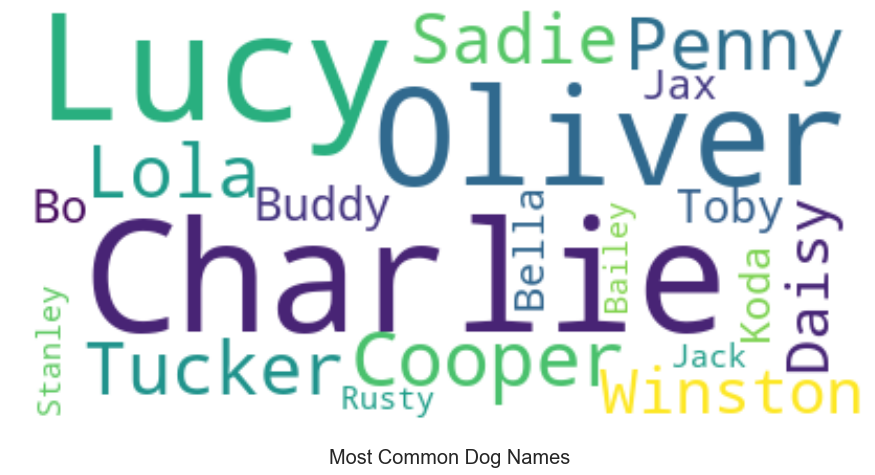

In [98]:
#Create the input text containing the dog names
names = list(filter(lambda name: name!='None',df.name))
text = ' '.join(names)
wordcloud = WordCloud(max_words = 20, background_color='white', colormap='viridis').generate(text)

#Draw the wordcloud
fig = plt.figure(figsize = [15,10])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Most Common Dog Names',y=-0.1, fontdict={'fontsize':20});

### <font color="red"> Topic 2 </font>: Most Popular Dog Breeds

<b>Objective:</b>

Create a treemap of the most common dog breeds.

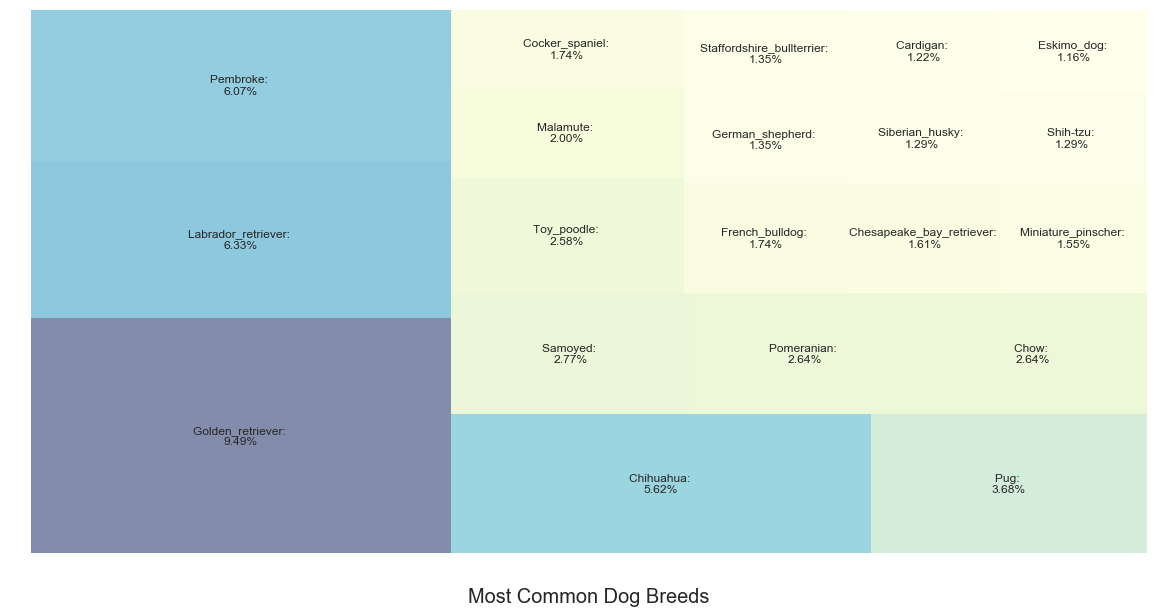

In [99]:
#Create the lists of values and labels
labels = df.breed.value_counts().head(20).keys()
values = df.breed.value_counts().head(20).values

#Create the list of percentages for each of the selected dog breeds
total = df.breed.value_counts().sum()
percentages = []
for value in values:
    percentages.append(value/total)

#Adjust the labels to include the values as well, to be more informative
labels_values = []
for label,percentage in zip(labels,percentages):
    labels_values.append(label + ': \n'+str(percentage*100)[:4]+'%')

#Build the treemap
fig = plt.figure(figsize = [20,10])
cmap = mpl.cm.YlGnBu
norm = mpl.colors.Normalize(vmin = min(values), vmax = max(values))
colors = [cmap(norm(value)) for value in values]
squarify.plot(sizes=values,label=labels_values, alpha=.5, color=colors);
plt.margins(x=0,y=0)
plt.title('Most Common Dog Breeds',y=-0.1, fontdict={'fontsize':20});
plt.axis('off');

### <font color="red"> Topic 3 </font>: Rating Distribution

<b>Objective:</b>

Present how the dog ratings are distributed (what are the most/less common).

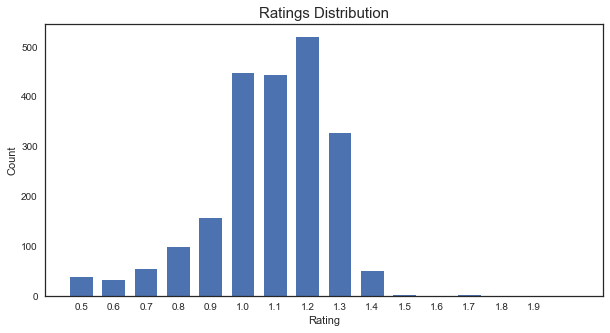

In [100]:
#Rating Distribution
plt.figure(figsize = [10,5])
bins = np.arange(0.45,2.15,0.1)
plt.xticks(np.arange(0.5,2,0.1))
plt.hist(data = df, x='rating',bins=bins,rwidth=0.7)
plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Ratings Distribution',fontdict={'fontsize':15});

### <font color="red"> Topic 4 </font>: Highest Rated Breed

<b>Objective:</b>
Build a list of the dog breeds which are, on average, rated the highest.

In [101]:
#Select the 20 most common breeds
breeds = df.breed.value_counts().head(20).keys()

#Initialize the empty lists for ratings, retweets and favorite counts
#These will store the info for each of the 20 selected dog breeds
ratings = []
retweets = []
favorites = []

#Gather the data for the most common 20 dog breeds
for breed in breeds:
    ratings.append(df[df.breed == breed].groupby(['breed'])['rating'].mean()[0])
    retweets.append(df[df.breed == breed].groupby(['breed'])['retweet_count'].mean()[0])
    favorites.append(df[df.breed == breed].groupby(['breed'])['favorite_count'].mean()[0])

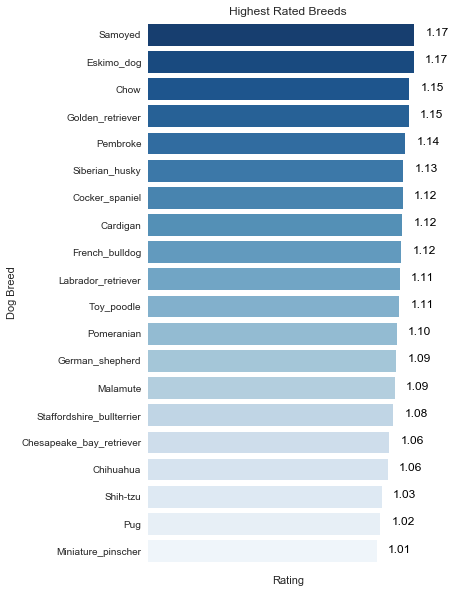

In [102]:
#Create the input dataframe storing breed and rating data
graph_df = pd.DataFrame()
graph_df['breed'] = breeds
graph_df['ratings'] = ratings

#Sort the input based on rating 
graph_df.sort_values(by='ratings',ascending=False,inplace=True)

#Build the barplot
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(5)
#Add the values next to the bars 
for i,v in enumerate(graph_df.ratings):
    ax.text(v+0.05, i+.05, str(v)[:4], color='black')
sns.barplot(x=graph_df.ratings, y=graph_df.breed,ax = ax, palette='Blues_r')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set(title='Highest Rated Breeds', xlabel = 'Rating', ylabel = 'Dog Breed')
sns.despine(fig,bottom=True,left=True);

### <font color="red"> Topic 5 </font>: Most Retweeted Breed

<b>Objective:</b>
Build a list of the dog breeds which are, on average, retweeted the most.

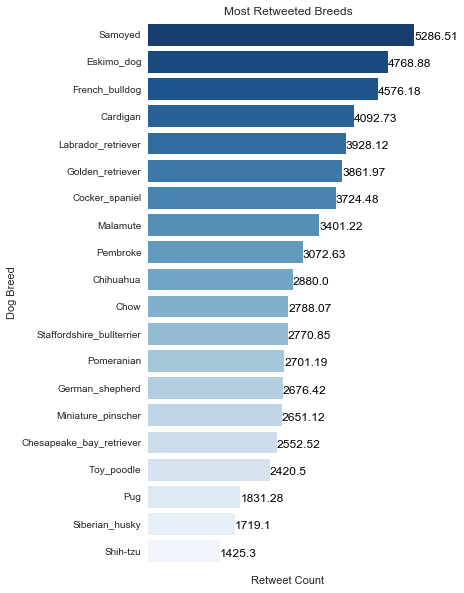

In [103]:
#Create the input dataframe storing breed and rating data
graph_df = pd.DataFrame()
graph_df['breed'] = breeds
graph_df['retweets'] = retweets

#Sort the input based on rating 
graph_df.sort_values(by='retweets',ascending=False,inplace=True)

#Build the barplot
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(5)
#Add the values next to the bars 
for i,v in enumerate(graph_df.retweets):
    ax.text(v+0.54, i+.2, str(v)[:7], color='black')
sns.barplot(x=graph_df.retweets, y=graph_df.breed,ax = ax, palette='Blues_r')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set(title='Most Retweeted Breeds', xlabel = 'Retweet Count', ylabel = 'Dog Breed')
sns.despine(fig,bottom=True,left=True);

### <font color="red"> Topic 6 </font>: Favorite Breed

<b>Objective:</b>
Build a list of the dog breeds which are, on average, added to favourite, the most.

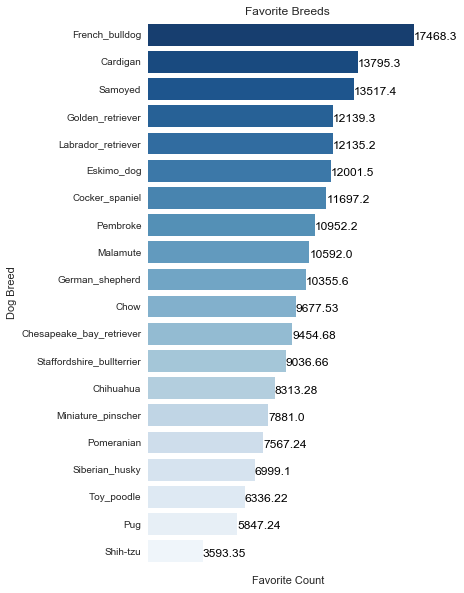

In [104]:
#Create the input dataframe storing breed and rating data
graph_df = pd.DataFrame()
graph_df['breed'] = breeds
graph_df['favorites'] = favorites

#Sort the input based on rating 
graph_df.sort_values(by='favorites',ascending=False,inplace=True)

#Build the barplot
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(5)
#Add the values next to the bars 
for i,v in enumerate(graph_df.favorites):
    ax.text(v+0.54, i+.2, str(v)[:7], color='black')
sns.barplot(x=graph_df.favorites, y=graph_df.breed,ax = ax, palette='Blues_r')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set(title='Favorite Breeds', xlabel = 'Favorite Count', ylabel = 'Dog Breed')
sns.despine(fig,bottom=True,left=True);